<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week9/Text_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Similarity 

In [ ]:
#nltk.download('punkt')
# we update and install spaCy
# !pip install -U spacy

In [ ]:
pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=09bdc9fb4cbcef780f6b81234fe4d5bd14b21038ec19eed592cd9177857c4edd
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


It's much easier to use an existing library that does all this preprocessing for us (but it's limited to wikipedia articles).

In [ ]:
import wikipedia

topics = ["Albert Einstein", 
          "A da Lovelace",
          "Abraham Lincoln",
          "Stephen Hawking", 
          "Steve J obs",
          "Bill G ates",
          "Bill Clinton"
]

data = [wikipedia.summary(topics[p], sentences=20) for p in range(len(topics))]

# we will try this later
# data = [wikipedia.page(topics[p]).content for p in range(len(topics))]

In [ ]:
# show the first sentences about Ada Lovelace
data[1]

'Augusta Ada King, Countess of Lovelace (née Byron; 10 December 1815 – 27 November 1852) was an English mathematician and writer, chiefly known for her work on Charles Babbage\'s proposed mechanical general-purpose computer, the Analytical Engine. She was the first to recognise that the machine had applications beyond pure calculation, and to have published the first algorithm intended to be carried out by such a machine. As a result, she is often regarded as the first computer programmer.Ada Byron was the only legitimate child of poet Lord Byron and Lady Byron. All of Byron\'s other children were born out of wedlock to other women. Byron separated from his wife a month after Ada was born and left England forever. Four months later, he commemorated the parting in a poem that begins, "Is thy face like thy mother\'s my fair child! ADA! sole daughter of my house and heart?" He died in Greece when Ada was eight. Her mother remained bitter and promoted Ada\'s interest in mathematics and log

## Converting the text into vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
import pandas as pd

stopwords = _stop_words.ENGLISH_STOP_WORDS

# using default tokenizer 
count = CountVectorizer(ngram_range=(1,2), stop_words = None)
bow = count.fit_transform(data)

## Computing the Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# compute first item against all the rest
cosine_similarity(bow[0:1], bow)

array([[1.        , 0.34499993, 0.43749309, 0.58919088, 0.55037199,
        0.42078143, 0.3978623 ]])

We see that the maximum cosine similarity is achieved for the 4th item and it is 0.69. The above shows that "Albert Einstein" is more similar to "Steven Hawking".

Now let's see all the pairwise similarities.


In [ ]:
pairwise_similarities = cosine_similarity(bow, bow)

pairwise_df = pd.DataFrame(
    pairwise_similarities,
    columns = topics,
    index = topics
)
pairwise_df

,Albert Einstein,A da Lovelace,Abraham Lincoln,Stephen Hawking,Steve J obs,Bill G ates,Bill Clinton
Albert Einstein,1.000000,0.345000,0.437493,0.589191,0.550372,0.420781,0.397862
A da Lovelace,0.345000,1.000000,0.398811,0.403004,0.433322,0.331869,0.372918
Abraham Lincoln,0.437493,0.398811,1.000000,0.511476,0.548259,0.447159,0.483488
Stephen Hawking,0.589191,0.403004,0.511476,1.000000,0.590199,0.476354,0.440723
Steve J obs,0.550372,0.433322,0.548259,0.590199,1.000000,0.553468,0.455594
Bill G ates,0.420781,0.331869,0.447159,0.476354,0.553468,1.000000,0.393454
Bill Clinton,0.397862,0.372918,0.483488,0.440723,0.455594,0.393454,1.000000


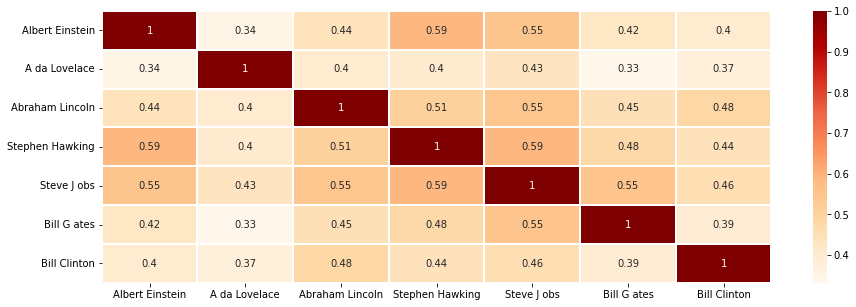

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# show it 
plt.figure(figsize=(15,5))
sns.heatmap(
    pairwise_df,
    cmap='OrRd',
    linewidth=1,
    annot=True
)

# Exercise 1

In the first block, uncomment this code:

> `# data = [wikipedia.page(topics[p]).content for p in range(len(topics))]`

to get the full text from each wikipedia entry, not just a summary.

**Questions**:
1. What do you notice in the pairwise similarities?
2. Why is this happening?

# Exercise 2

We will remedy what you noticed before. 

1. How can we do it?
2. How does the new pairwise matrix look like now?